In [1]:
# load the dataset

import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris_df = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [2]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
156,6.5,3.0,5.2,2.0,NaN
157,6.2,3.4,5.4,2.3,Iris-virginica


# 1. The importance of missing values

### Number of missing values of each attribute

In [3]:
iris_df.isna().sum(axis = 0)

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64

### Remove missing values

In [4]:
iris_df = iris_df.dropna()

#### You can see there's no more missing values:

In [5]:
iris_df.isna().sum(axis = 0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [6]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,Iris-virginica
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
157,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Non-numerical data

In [7]:
le = preprocessing.LabelEncoder()
iris_df['target']= le.fit_transform(iris_df['target']) 

/var/folders/6r/w62sfhrd3ngblgfy4mbzgg700000gn/T/ipykernel_2351/1258786972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['target']= le.fit_transform(iris_df['target'])


In [8]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


### Check values:

In [9]:
le.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 3. Normalization

### Before:

In [10]:
iris_df.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64

In [11]:
iris_df.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
target          0.671141
dtype: float64

### After:

In [12]:
ss = preprocessing.StandardScaler()
# not normalizing labels
norm_iris_df = iris_df.copy()
norm_iris_df[['sepal_length', 'sepal_width', 'petal_length','petal_width']] = ss.fit_transform(norm_iris_df[['sepal_length', 'sepal_width', 'petal_length','petal_width']])

In [13]:
norm_iris_df.mean()

sepal_length   -4.736952e-16
sepal_width    -6.631732e-16
petal_length    3.315866e-16
petal_width    -2.842171e-16
target          1.000000e+00
dtype: float64

In [14]:
norm_iris_df.var()

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
target          0.671141
dtype: float64

# 4. PCA

In [15]:
pca = PCA(n_components=2)
n_data = pca.fit_transform(norm_iris_df)
p_iris_df = pd.DataFrame(data = n_data, columns = ['PC1', 'PC2'])
p_iris_df['target'] = list(norm_iris_df.target)
p_iris_df

,PC1,PC2,target
0,-2.476965,0.500585,0
1,-2.313886,-0.659120,0
2,-2.567994,-0.324384,0
3,-2.509251,-0.580856,0
4,-2.588980,0.668663,0
...,...,...,...
145,2.118469,0.385062,2
146,1.835538,-0.904895,2
147,1.800721,0.266694,2
148,1.673850,1.014595,2


# 5. Ploting

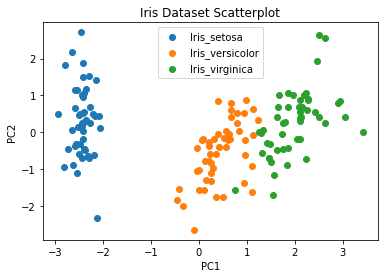

In [16]:
Iris_setosa = p_iris_df[p_iris_df['target']==0]
Iris_versicolor = p_iris_df[p_iris_df['target']==1]
Iris_virginica = p_iris_df[p_iris_df['target']==2]

plt.scatter(Iris_setosa['PC1'],Iris_setosa['PC2'], label = 'Iris_setosa')
plt.scatter(Iris_versicolor['PC1'],Iris_versicolor['PC2'], label = 'Iris_versicolor')
plt.scatter(Iris_virginica['PC1'],Iris_virginica['PC2'], label = 'Iris_virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Dataset Scatterplot')
plt.legend()
plt.show()

## Box Plot

### Not normalized:

<AxesSubplot:>

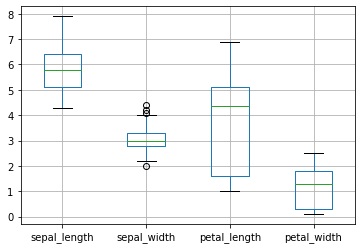

In [17]:
iris_df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length','petal_width'])

### Normalized

<AxesSubplot:>

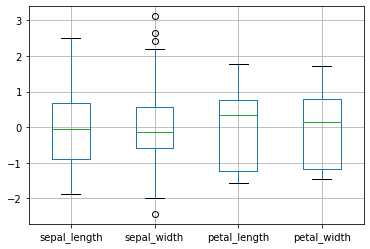

In [18]:
norm_iris_df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length','petal_width'])